<a href="https://colab.research.google.com/github/andreacangiani/NSPDE-ANA2024/blob/main/Python/CP1_worked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.sparse import diags

## Exercise 1

Implement the BD and CD formulas in matrix form as done for the FD forumla. Display in the same plot the error obtained with all three formulas to verify the theoretical order of convergence.

In [4]:
# Define formulas:

def FD1(n):
    return diags([-np.ones(n), np.ones(n-1)], [0, 1]).toarray()

def CD1(n):
    return diags([np.ones(n-1), -np.ones(n-1)], [1, -1]).toarray()

def BD1(n):
    return diags([-np.ones(n-1), np.ones(n)], [-1, 0]).toarray()

In [5]:
# Create symbolic variables, functions and derivatives

t = sym.var('t')

fsym = sym.sin(t)
fdsym = fsym.diff(t,1)
fd2sym = fdsym.diff(t,1)

f = sym.lambdify(t,fsym)
df = sym.lambdify(t,fdsym)
d2f = sym.lambdify(t,fd2sym)

In [6]:
# Data for the problem and convergence plot

a, b, = 0, 5
n_exp = 10
nn = np.array([2**i + 1 for i in range(3, n_exp + 2)])

In [7]:
# Compute the error between approximated and exact solution evaluated at the same points
# Repeat with different number of points and store the errors

error_FD1 = []
error_CD1 = []
error_BD1 = []

for i in range(n_exp - 1):
    x = np.linspace(a, b, nn[i])
    h = (b - a) / (nn[i] - 1)
    
    approx_FD1 = np.dot(FD1(nn[i]), f(x)) / h
    approx_CD1 = np.dot(CD1(nn[i]), f(x)) / (2 * h)
    approx_BD1 = np.dot(BD1(nn[i]), f(x)) / h

    exact = df(x)
    error_FD1.append(np.max(np.abs(approx_FD1[:-1] - exact[:-1])))
    error_CD1.append(np.max(np.abs(approx_CD1[1:-1] - exact[1:-1])))
    error_BD1.append(np.max(np.abs(approx_BD1[1:] - exact[1:])))

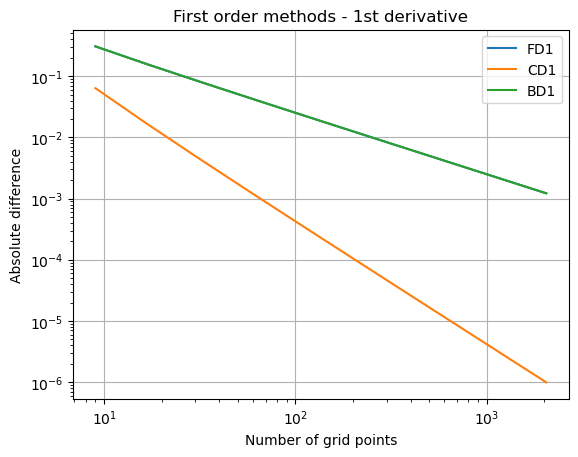

In [8]:
# Plot error vs number of points (log-log scale)

plt.loglog(nn, error_FD1, label='FD1')
plt.loglog(nn, error_CD1, label='CD1')
plt.loglog(nn, error_BD1, label='BD1')
plt.legend()
plt.xlabel('Number of grid points')
plt.ylabel('Absolute difference')
plt.title('First order methods - 1st derivative')
plt.grid()
plt.show()

## Exercise 2

Look up in Chapter 3 of the typed lecture notes NSPDE.pdf the one-sided second order formulas for the approximation of first derivatives. Implement these formulas. Compare these formulas with the CD formula by plotting errors as before in a single loglog plot. Comment your results.

In [9]:
def BD2(n):
    return diags([np.ones(n-2), -4*np.ones(n-1), 3*np.ones(n)], [-2, -1, 0]).toarray()

def FD2(n):
    return diags([-np.ones(n-2), 4*np.ones(n-1), -3*np.ones(n)], [2, 1, 0]).toarray()

In [10]:
error_BD2 = []
error_FD2 = []

for i in range(n_exp - 1):
    x = np.linspace(a, b, nn[i])
    h = (b - a) / (nn[i] - 1)
    
    approx_BD2 = np.dot(BD2(nn[i]), f(x)) / (2 * h)
    approx_FD2 = np.dot(FD2(nn[i]), f(x)) / (2 * h)

    exact = df(x)
    error_BD2.append(np.max(np.abs(approx_BD2[2:] - exact[2:])))
    error_FD2.append(np.max(np.abs(approx_FD2[:-2] - exact[:-2])))

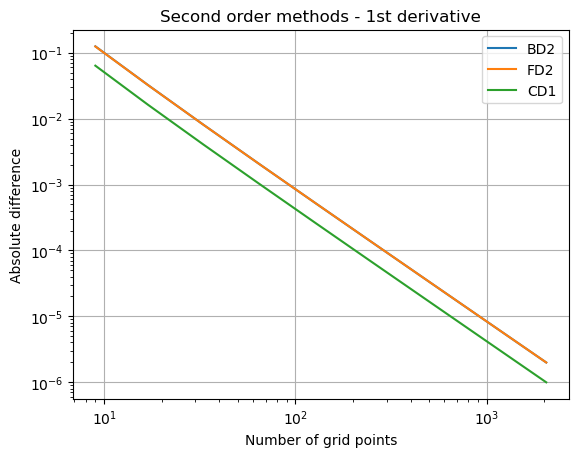

In [11]:
plt.loglog(nn, error_BD2, label='BD2')
plt.loglog(nn, error_FD2, label='FD2')
plt.loglog(nn, error_CD1, label='CD1')
plt.legend()
plt.xlabel('Number of grid points')
plt.ylabel('Absolute difference')
plt.title('Second order methods - 1st derivative')
plt.grid()
plt.show()

Comment: all three schemes converge with second-order accuracy (as evidenced by the slopes in the log–log plot), but the central difference (CD) formula achieves the smallest overall error, reflecting its symmetric nature. The one-sided schemes have larger error constants and lie above CD in the plot, even though their slopes match.

## Exercise 3

Repeat Exercise 2 this time considering the centred and one sided formulas for the approximation of the second derivative also found in the lecture notes.

In [12]:
def CD1_2nd(n):
    return diags([np.ones(n-1), -2*np.ones(n), np.ones(n-1)], [1, 0, -1]).toarray()

def BD1_2nd(n):
    return diags([np.ones(n-2), -2*np.ones(n-1), np.ones(n)], [-2, -1, 0]).toarray()
    
def FD1_2nd(n):
    return diags([np.ones(n-2), -2*np.ones(n-1), np.ones(n)], [2, 1, 0]).toarray()

In [13]:
error_FD1_2nd = []
error_BD1_2nd = []
error_CD1_2nd = []

for i in range(n_exp - 1):
    x = np.linspace(a, b, nn[i])
    h = (b - a) / (nn[i] - 1)

    approx_FD1_2nd = np.dot(FD1_2nd(nn[i]), f(x)) / h**2
    approx_BD1_2nd = np.dot(BD1_2nd(nn[i]), f(x)) / h**2
    approx_CD1_2nd = np.dot(CD1_2nd(nn[i]), f(x)) / h**2

    exact_2nd = d2f(x)
    error_FD1_2nd.append(np.max(np.abs(approx_FD1_2nd[:-2] - exact_2nd[:-2])))
    error_BD1_2nd.append(np.max(np.abs(approx_BD1_2nd[2:] - exact_2nd[2:])))
    error_CD1_2nd.append(np.max(np.abs(approx_CD1_2nd[1:-1] - exact_2nd[1:-1])))

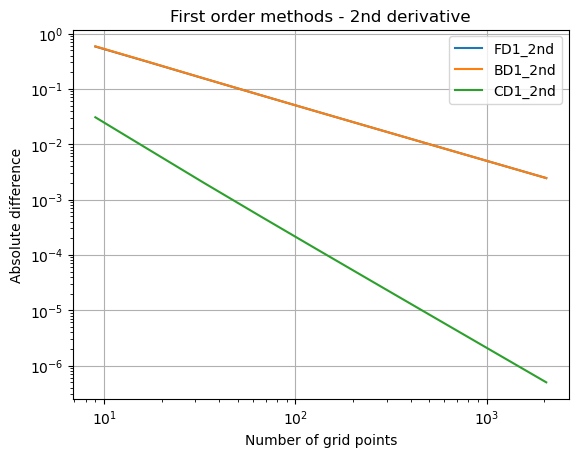

In [14]:
plt.loglog(nn, error_FD1_2nd, label='FD1_2nd')
plt.loglog(nn, error_BD1_2nd, label='BD1_2nd')
plt.loglog(nn, error_CD1_2nd, label='CD1_2nd')
plt.legend()
plt.xlabel('Number of grid points')
plt.ylabel('Absolute difference')
plt.title('First order methods - 2nd derivative')
plt.grid()
plt.show()

Comment: the one-sided second-derivative formulas (FD1_2nd, BD1_2nd) are only first-order accurate, so their errors decrease more slowly in the log–log plot, while the centered formula (CD1_2nd) is second-order accurate, achieving both a steeper slope (faster decrease of the error) and a smaller overall error.